In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
nd=1200
ns=50
tmp_decay = np.genfromtxt(f"data/paraemter_serach/nd{nd}_ns{ns}/nd{nd}_ns{ns}_neuron10_2.txt") # dim = (n_combinations*n_repeat, 4)

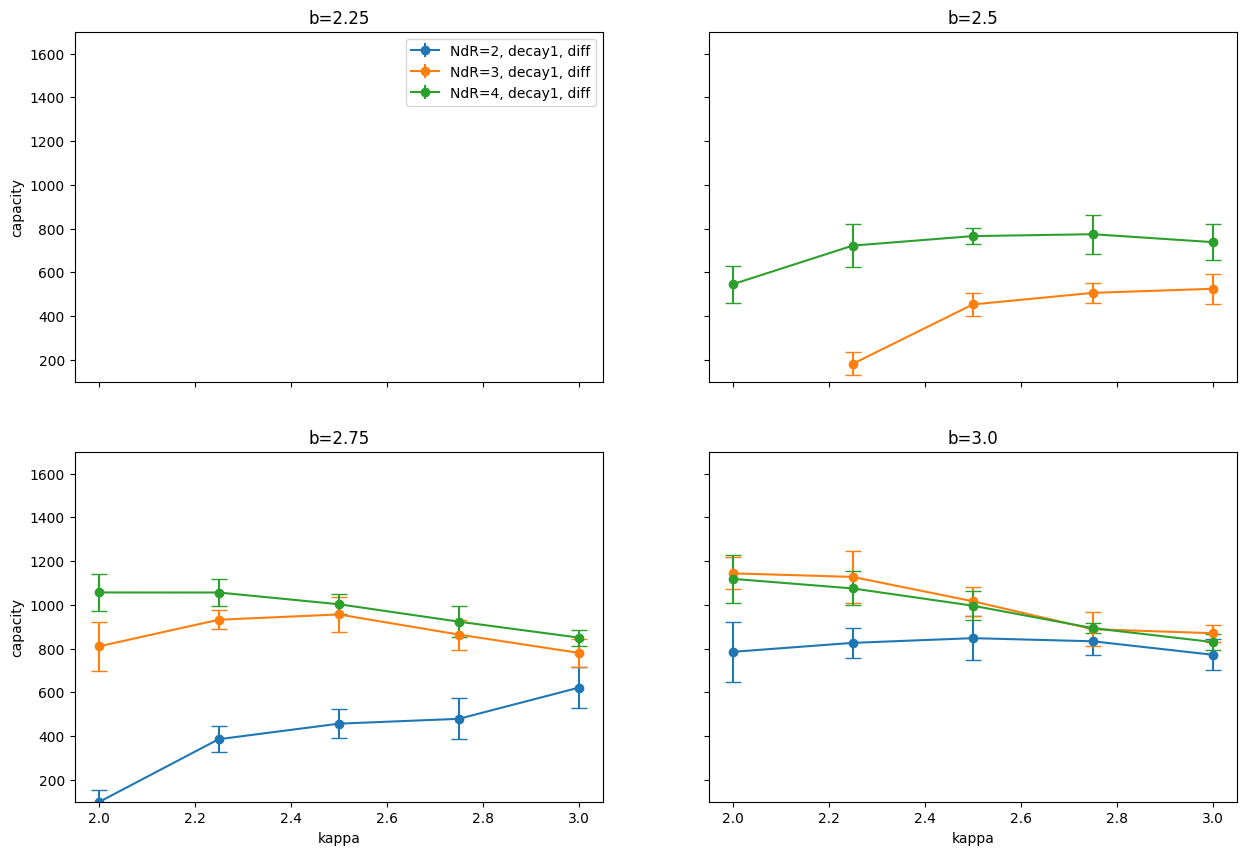

In [15]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 10))
n_repeat = 6 # number of repetitions for each parameter combination. 
b_list = [2.25, 2.5, 2.75, 3.0]
ndR_list = {2, 3, 4}

for b_idx in range(len(b_list)):
    for ndR_idx, ndR in enumerate(ndR_list):

        arg_ndR_decay = np.argwhere(np.bitwise_and(tmp_decay[:, 0]==b_list[b_idx], tmp_decay[:, 2]==ndR)).reshape((-1, ))
        tmp_ndR_decay = tmp_decay[arg_ndR_decay]
        tmp_ndR_decay = tmp_ndR_decay.reshape((-1, n_repeat, 4))
        tmp_ndR_decay = tmp_ndR_decay[np.argsort(tmp_ndR_decay[:, 0, 1], axis=0)]
        mean_decay = np.mean(tmp_ndR_decay[:, :, -1], axis=-1)
        stdev_decay = np.std(tmp_ndR_decay[:, :, -1], axis=-1)
        axes[b_idx//2, b_idx%2].errorbar(tmp_ndR_decay[:, 0, 1], mean_decay, stdev_decay, fmt="-o", capsize=6, label=f"NdR={ndR}, decay1, diff", c=f"C{ndR_idx}")
    
    axes[b_idx//2, b_idx%2].set_title(f"b={b_list[b_idx]}")

plt.ylim(100, 1700)
axes[1, 1].set_xlabel("kappa")
axes[1, 0].set_xlabel("kappa")
axes[0, 0].set_ylabel("capacity")
axes[1, 0].set_ylabel("capacity")
axes[0, 0].legend()
